**지도학습** : 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용한다.


### 분류와 회귀
------------------------------------------------------

#### <분류>

+ 지도 학습에는 **분류, 회귀**가 있음
+ **이중 분류** : 두 개의 클래스로 분류하는 것
+ **다중 분류** : 셋 이상의 클래스로 분류하는 것
+ 이진 불류에서 '학습하고자 하는 클래스를' **양성 클래스**, 아닌 것을 **음성 클래스**라고 한다. 

#### <회귀>

+ 연속적인 숫자, 또는 프로그래밍 용어로 말하면 부동소수점수를 예측하는 것
+ 출력 값에 **연속성**이 있는지



### 일반화, 과대적합, 과소적합
--------------------------------------------------------

- **일반화** : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련세트에서 테스트 세트로 일반화 되었다고 한다.
- 간단한 모델이 새로운 데이터에 더 잘 일반화될 것이라고 예상할 수 있음
- **과대적합**: 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것, 그래서 일반화 시키기 어렵다.
- **과소적합**: 가진 정보가 매우 적어서 너무 간단한 모델이 되는것, 그래서 대부분의 데이터가 일반화가 된다. 
**우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.**



### 지도학습 알고리즘
------------------------------------------------------------

> 데이터셋 만들기

C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46160 missing from c

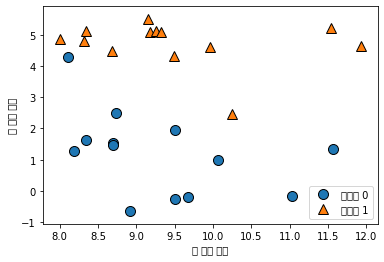

In [7]:
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge() # 인위적으로 만든 이진분류 데이터셋
mglearn.discrete_scatter(X[:,0], X[:, -1], y) #descrete_scatter(x값의 리스트, y값의 리스트, 대응되는 color리스트)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:" , X.shape)

Text(0, 0.5, '타깃')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from cur

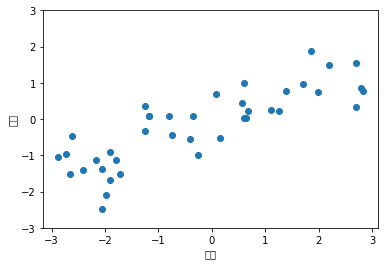

In [10]:
X,y = mglearn.datasets.make_wave(n_samples = 40)
# make_wave -> wave데이터 셋을 만듬, 
# wave 데이터 셋-> 입력 특성 하나와 모델링할 타깃 변수를 가진다. 

plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [17]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer() # 유방함 데이터
print("cancer.keys():\n", cancer.keys())
print("유방암 데이터의 형태:", cancer.data.shape)
print("클래스별 샘플 개수:\n", {n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print("특성 이름:\n", cancer.feature_names)

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태: (569, 30)
클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}
특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
